c:\users\yulya\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
c:\users\yulya\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


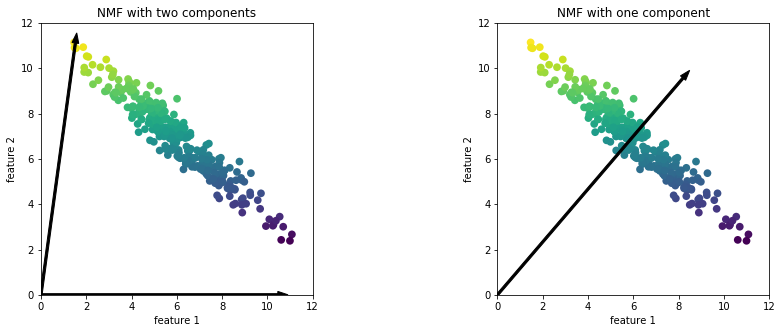

In [1]:
import mglearn
mglearn.plots.plot_nmf_illustration()

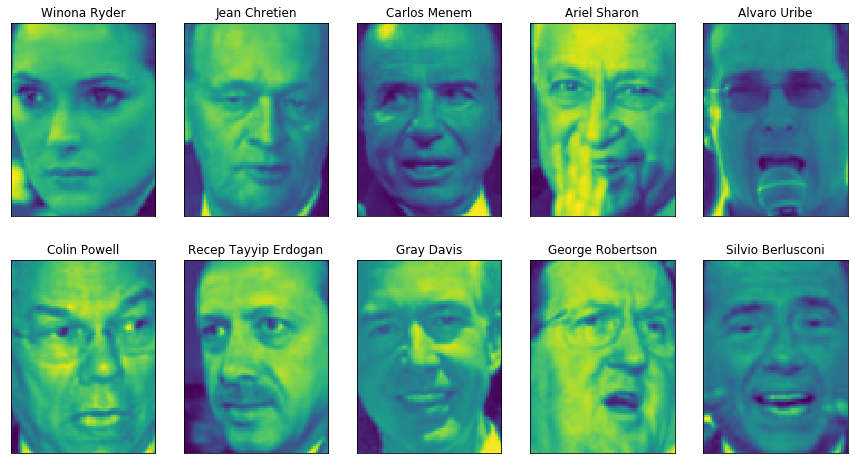

In [6]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])
    
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# для получения большей стабильности масштабируем шкалу оттенков серого так, чтобы значения
# были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255
X_people = X_people / 255.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))
_____________________________________________________nmf_faces - 848.9s, 14.1min


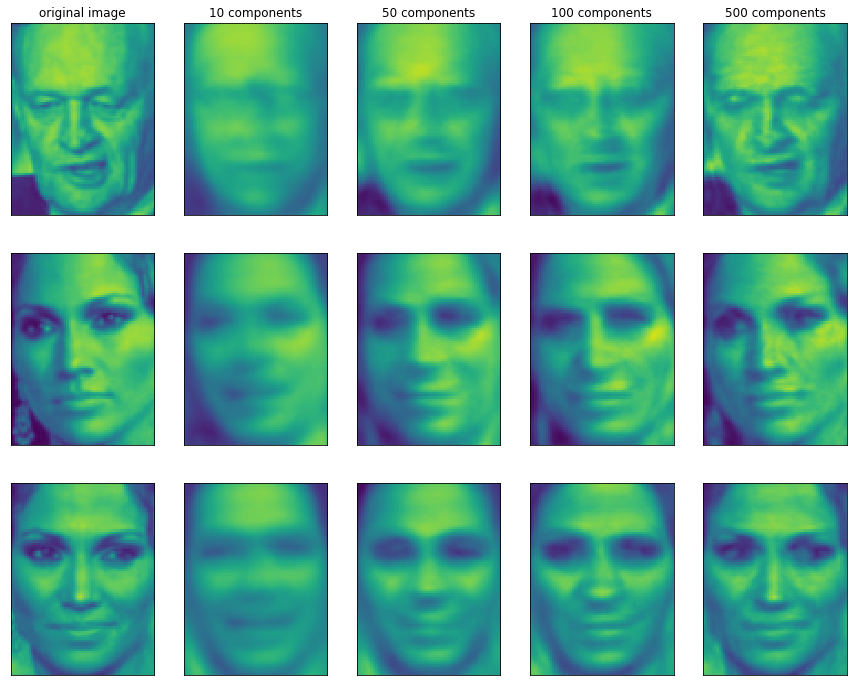

In [7]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

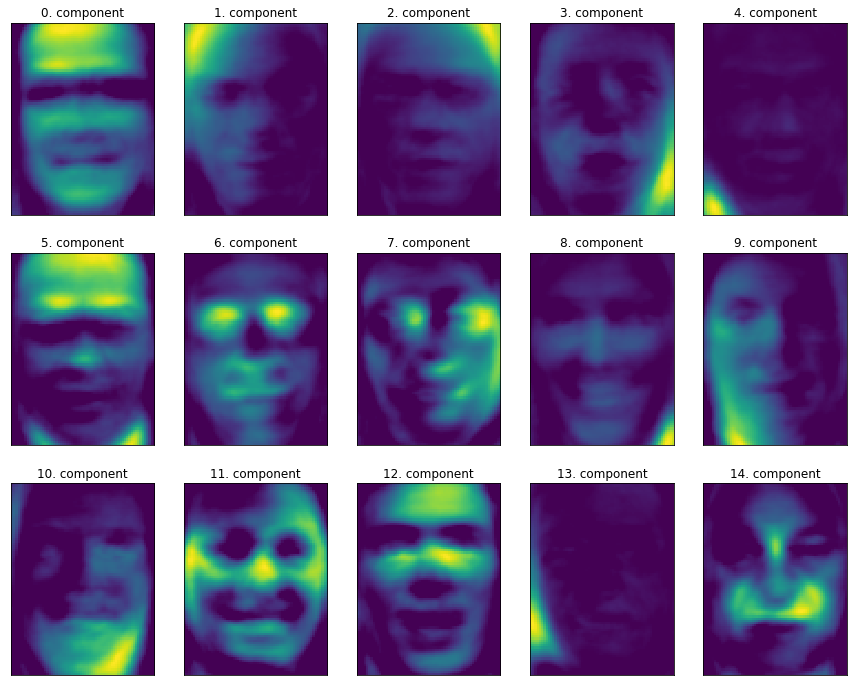

In [8]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape))
 ax.set_title("{}. component".format(i))

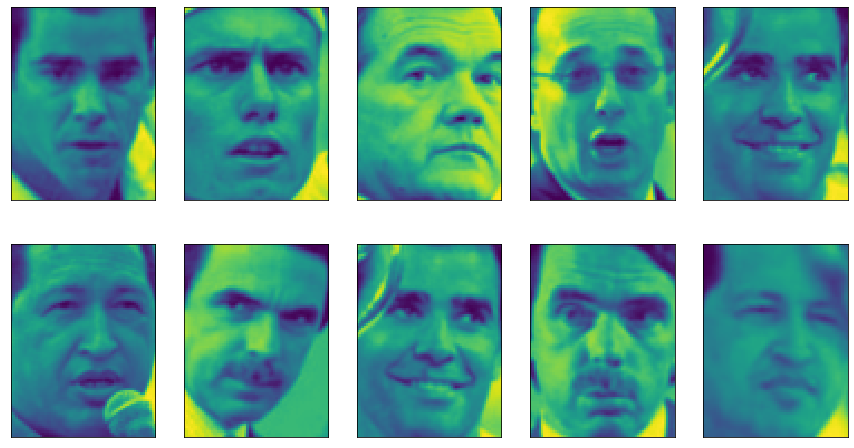

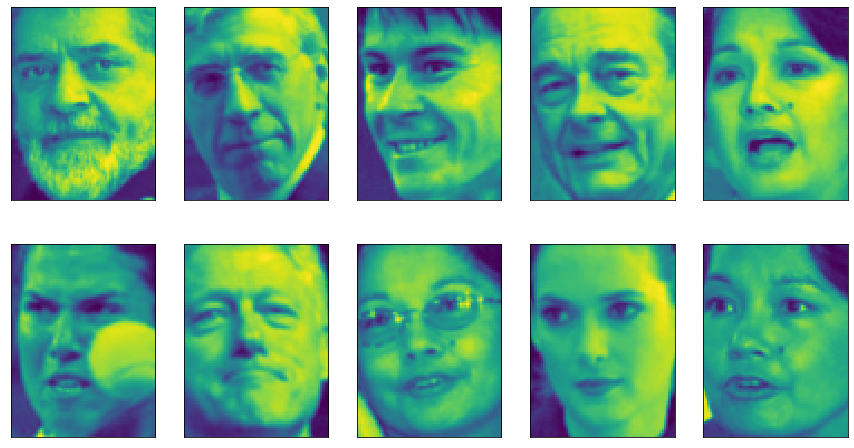

In [9]:
compn = 3
# сортируем по 3-й компоненте, выводим первые 10 изображений
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))
compn = 7
# сортируем по 7-й компоненте, выводим первые 10 изображений
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Сигнал')

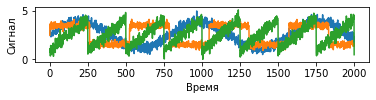

In [10]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Время")
plt.ylabel("Сигнал")

In [11]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Форма измерений: {}".format(X.shape))

Форма измерений: (2000, 100)


In [12]:
nmf = NMF(n_components=3, random_state=42) 
S_ = nmf.fit_transform(X)
print("Форма восстановленного сигнала: {}".format(S_.shape))

Форма восстановленного сигнала: (2000, 3)


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
H = pca.fit_transform(X)

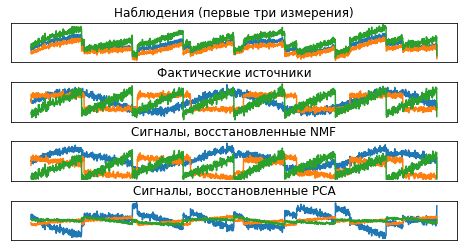

In [15]:
models = [X, S, S_, H]
names = ['Наблюдения (первые три измерения)',
 'Фактические источники',
 'Сигналы, восстановленные NMF',
 'Сигналы, восстановленные PCA']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
 subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
 ax.set_title(name)
 ax.plot(model[:, :3], '-')

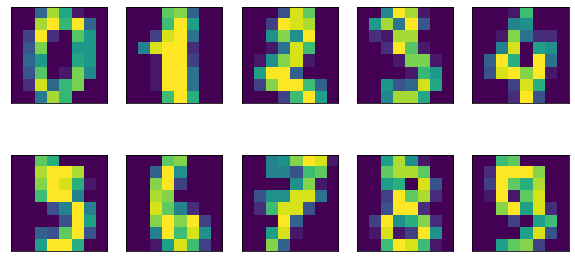

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
 subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
 ax.imshow(img)

Text(0, 0.5, 'Вторая главная компонента')

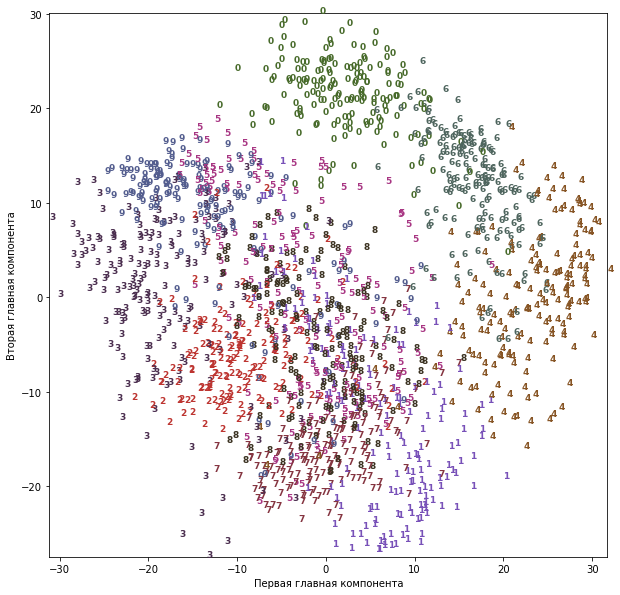

In [17]:
# строим модель PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # строим график, где цифры представлены символами вместо точек
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

Text(0.5, 0, 't-SNE признак 1')

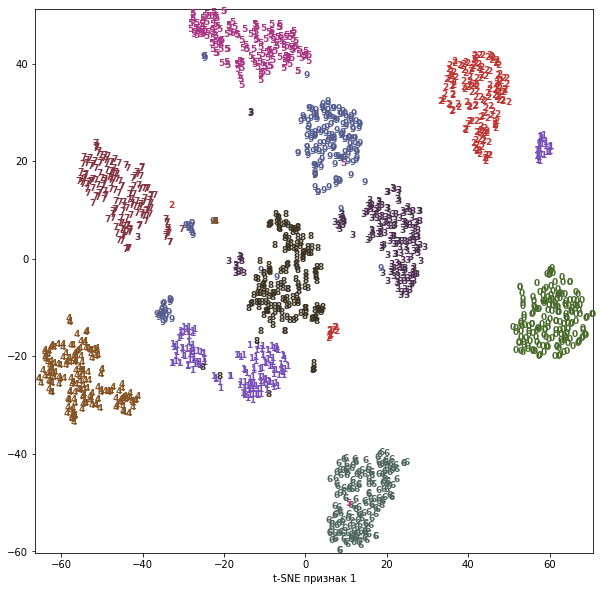

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# используем метод fit_transform вместо fit, т.к. класс TSNE не использует метод transform
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # строим график, где цифры представлены символами вместо точек
 plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")